In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import plot_importance

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/Users/suchirmvelpanur/Desktop/ISFCR Internship/datasets/IDS Datasets/ALLFLOWMETER_HIKARI2021.csv')

In [4]:
df

,Unnamed: 0.1,Unnamed: 0,uid,originh,originp,responh,responp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,...,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,traffic_category,Label
0,0,0,Cg61Jch3vdz9DBptj,103.255.15.23,13316,128.199.242.104,443,2.207588,15,14,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,29200,65160,0,Bruteforce-XML,1
1,1,1,CdRIlqLWdj35Y9vW9,103.255.15.23,13318,128.199.242.104,443,15.624266,15,14,...,1.534300e+07,1.534300e+07,1.534300e+07,1.534300e+07,0.0,29200,65160,0,Bruteforce-XML,1
2,2,2,CLzp9Khd0Y09Qkgrg,103.255.15.23,13320,128.199.242.104,443,12.203357,14,13,...,1.196814e+07,1.196814e+07,1.196814e+07,1.196814e+07,0.0,29200,65160,0,Bruteforce-XML,1
3,3,3,Cnf1YA4iLB4CSNWB88,103.255.15.23,13322,128.199.242.104,443,9.992448,14,13,...,9.759205e+06,9.759205e+06,9.759205e+06,9.759205e+06,0.0,29200,65160,0,Bruteforce-XML,1
4,4,4,C4ZKvv3fpO72EAOsJ6,103.255.15.23,13324,128.199.242.104,443,7.780611,14,14,...,7.545305e+06,7.545305e+06,7.545305e+06,7.545305e+06,0.0,29200,65160,0,Bruteforce-XML,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555273,555273,280838,C9b6Aa2csiogu3vVp9,103.255.15.42,138,103.255.15.255,138,0.000000,1,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0,0,0,XMRIGCC CryptoMiner,1
555274,555274,280839,CGDT4r4PAbp3mvaI6k,103.255.15.42,138,103.255.15.255,138,0.000000,1,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0,0,0,XMRIGCC CryptoMiner,1
555275,555275,280840,CJUxTk4Qd0kHliUKR9,103.255.15.42,138,103.255.15.255,138,0.000000,1,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0,0,0,XMRIGCC CryptoMiner,1
555276,555276,280841,CknUJi2R1iYJG3li3k,103.255.15.42,138,103.255.15.255,138,0.000000,1,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0,0,0,XMRIGCC CryptoMiner,1


In [5]:
df.Label.value_counts()

Label
0    517582
1     37696
Name: count, dtype: int64

In [6]:
# checking the shape of the dataset
shape = df.shape

print(f"The shape of the dataframe is {shape[0]} rows and {shape[1]} columns")

The shape of the dataframe is 555278 rows and 88 columns


In [7]:
# checking the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555278 entries, 0 to 555277
Data columns (total 88 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0.1              555278 non-null  int64  
 1   Unnamed: 0                555278 non-null  int64  
 2   uid                       555278 non-null  object 
 3   originh                   555278 non-null  object 
 4   originp                   555278 non-null  int64  
 5   responh                   555278 non-null  object 
 6   responp                   555278 non-null  int64  
 7   flow_duration             555278 non-null  float64
 8   fwd_pkts_tot              555278 non-null  int64  
 9   bwd_pkts_tot              555278 non-null  int64  
 10  fwd_data_pkts_tot         555278 non-null  int64  
 11  bwd_data_pkts_tot         555278 non-null  int64  
 12  fwd_pkts_per_sec          555278 non-null  float64
 13  bwd_pkts_per_sec          555278 non-null  f

In [8]:
# summary statistics
df.describe()

,Unnamed: 0.1,Unnamed: 0,originp,responp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Label
count,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,...,5.552780e+05,5.552780e+05,5.552780e+05,5.552780e+05,5.552780e+05,5.552780e+05,555278.000000,555278.000000,555278.000000,555278.000000
mean,277638.500000,137369.392132,38673.198034,5082.161647,9.306544,18.264091,18.892578,7.956928,15.803417,1720.704202,...,1.335883e+05,3.490637e+06,5.000630e+06,8.312942e+06,4.073219e+06,7.992576e+05,14750.725718,21005.879513,4546.872210,0.067887
std,160295.095724,99946.804651,18071.825216,12915.812900,101.802730,463.901484,469.078877,73.441224,467.349374,4994.579973,...,8.289045e+06,1.804930e+07,2.326516e+07,9.683372e+07,1.915958e+07,7.206576e+06,15003.491439,29155.406813,11069.456088,0.251552
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,138819.250000,52201.000000,28581.000000,53.000000,0.000311,1.000000,1.000000,1.000000,0.000000,4.430152,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,277638.500000,121610.500000,42693.500000,443.000000,0.026218,2.000000,2.000000,2.000000,2.000000,39.760205,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5840.000000,0.000000,0.000000,0.000000
75%,416457.750000,211889.750000,53120.000000,443.000000,0.347231,10.000000,12.000000,3.000000,5.000000,80.376058,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,29200.000000,65160.000000,402.000000,0.000000
max,555277.000000,350709.000000,65535.000000,65522.000000,17393.030600,326292.000000,326827.000000,3953.000000,326822.000000,223696.213333,...,5.438463e+09,2.998038e+08,2.998038e+08,1.738680e+10,2.998038e+08,2.029962e+08,65535.000000,65535.000000,65535.000000,1.000000


In [9]:
# checking for duplicate rows
duplicate_rows = df.duplicated().sum()

print(f"The number of duplicate rows are {duplicate_rows}.")

The number of duplicate rows are 0.


In [10]:
# checking for the total amount of null values
df.isnull().sum()

Unnamed: 0.1            0
Unnamed: 0              0
uid                     0
originh                 0
originp                 0
                       ..
fwd_init_window_size    0
bwd_init_window_size    0
fwd_last_window_size    0
traffic_category        0
Label                   0
Length: 88, dtype: int64

In [11]:
# Find the number of unique values in each column
unique_counts = df.nunique()

print(unique_counts)

Unnamed: 0.1            555278
Unnamed: 0              350710
uid                     555278
originh                   2899
originp                  62886
                         ...  
fwd_init_window_size       515
bwd_init_window_size       185
fwd_last_window_size      3461
traffic_category             6
Label                        2
Length: 88, dtype: int64


In [12]:
value_count = df.value_counts()
value_count

Unnamed: 0.1  Unnamed: 0  uid                 originh         originp  responh          responp  flow_duration  fwd_pkts_tot  bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  fwd_pkts_per_sec  bwd_pkts_per_sec  flow_pkts_per_sec  down_up_ratio  fwd_header_size_tot  fwd_header_size_min  fwd_header_size_max  bwd_header_size_tot  bwd_header_size_min  bwd_header_size_max  flow_FIN_flag_count  flow_SYN_flag_count  flow_RST_flag_count  fwd_PSH_flag_count  bwd_PSH_flag_count  flow_ACK_flag_count  fwd_URG_flag_count  bwd_URG_flag_count  flow_CWR_flag_count  flow_ECE_flag_count  fwd_pkts_payload.min  fwd_pkts_payload.max  fwd_pkts_payload.tot  fwd_pkts_payload.avg  fwd_pkts_payload.std  bwd_pkts_payload.min  bwd_pkts_payload.max  bwd_pkts_payload.tot  bwd_pkts_payload.avg  bwd_pkts_payload.std  flow_pkts_payload.min  flow_pkts_payload.max  flow_pkts_payload.tot  flow_pkts_payload.avg  flow_pkts_payload.std  fwd_iat.min  fwd_iat.max   fwd_iat.tot   fwd_iat.avg    fwd_iat.std    bwd_iat.min  b

In [13]:
def print_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Column '{column}' has {len(unique_values)} unique values:")
        print(unique_values)
        print("\n")

print_unique_values(df)

Column 'Unnamed: 0.1' has 555278 unique values:
[     0      1      2 ... 555275 555276 555277]


Column 'Unnamed: 0' has 350710 unique values:
[     0      1      2 ... 280840 280841 280842]


Column 'uid' has 555278 unique values:
['Cg61Jch3vdz9DBptj' 'CdRIlqLWdj35Y9vW9' 'CLzp9Khd0Y09Qkgrg' ...
 'CJUxTk4Qd0kHliUKR9' 'CknUJi2R1iYJG3li3k' 'C82mlb2i3zEzpeTGQk']


Column 'originh' has 2899 unique values:
['103.255.15.23' '103.255.15.27' '103.255.15.20' ... '128.199.193.172'
 '192.241.215.105' '205.185.126.174']


Column 'originp' has 62886 unique values:
[13316 13318 13320 ...   990 35021 14711]


Column 'responh' has 7991 unique values:
['128.199.242.104' '128.199.88.81' '103.255.15.23' ... '103.120.247.252'
 '104.18.5.86' '104.18.4.86']


Column 'responp' has 4557 unique values:
[  443 42000 42001 ... 20881  6369 20800]


Column 'flow_duration' has 193558 unique values:
[ 2.207588 15.624266 12.203357 ...  1.525603  1.530101  1.52896 ]


Column 'fwd_pkts_tot' has 1448 unique values:
[  

In [14]:
df['traffic_category'].unique()

array(['Bruteforce-XML', 'Bruteforce', 'Background', 'Benign', 'Probing',
       'XMRIGCC CryptoMiner'], dtype=object)

In [15]:
df['Label'].unique()

array([1, 0])

In [16]:
filtered_label_0 = df.loc[df['Label'] == 0, 'traffic_category']
print(filtered_label_0.unique())

['Background' 'Benign']


In [17]:
filtered_label_0 = df.loc[df['Label'] == 1, 'traffic_category']
print(filtered_label_0.unique())

['Bruteforce-XML' 'Bruteforce' 'Probing' 'XMRIGCC CryptoMiner']


In [18]:
df.Label.value_counts()

Label
0    517582
1     37696
Name: count, dtype: int64

In [19]:
'''
=> Label 0 corresponding to all normal/benign packets
=> Label 1 corresponds to malicious/unauthorized network traffic
'''

'\n=> Label 0 corresponding to all normal/benign packets\n=> Label 1 corresponds to malicious/unauthorized network traffic\n'

In [20]:
#Preprocessing Stage

In [21]:
# Drop 'uid' and 'Unnamed : 0' columns as it has no relevance to the model
df.drop(columns=['uid', 'Unnamed: 0'], inplace=True)
# Rename 'Unnamed: 0.1' column to 'id'
df.rename(columns={'Unnamed: 0.1': 'id'}, inplace=True)
df

,id,originh,originp,responh,responp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,traffic_category,Label
0,0,103.255.15.23,13316,128.199.242.104,443,2.207588,15,14,6,6,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,29200,65160,0,Bruteforce-XML,1
1,1,103.255.15.23,13318,128.199.242.104,443,15.624266,15,14,6,6,...,1.534300e+07,1.534300e+07,1.534300e+07,1.534300e+07,0.0,29200,65160,0,Bruteforce-XML,1
2,2,103.255.15.23,13320,128.199.242.104,443,12.203357,14,13,6,5,...,1.196814e+07,1.196814e+07,1.196814e+07,1.196814e+07,0.0,29200,65160,0,Bruteforce-XML,1
3,3,103.255.15.23,13322,128.199.242.104,443,9.992448,14,13,6,5,...,9.759205e+06,9.759205e+06,9.759205e+06,9.759205e+06,0.0,29200,65160,0,Bruteforce-XML,1
4,4,103.255.15.23,13324,128.199.242.104,443,7.780611,14,14,6,5,...,7.545305e+06,7.545305e+06,7.545305e+06,7.545305e+06,0.0,29200,65160,0,Bruteforce-XML,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555273,555273,103.255.15.42,138,103.255.15.255,138,0.000000,1,0,1,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0,0,0,XMRIGCC CryptoMiner,1
555274,555274,103.255.15.42,138,103.255.15.255,138,0.000000,1,0,1,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0,0,0,XMRIGCC CryptoMiner,1
555275,555275,103.255.15.42,138,103.255.15.255,138,0.000000,1,0,1,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0,0,0,XMRIGCC CryptoMiner,1
555276,555276,103.255.15.42,138,103.255.15.255,138,0.000000,1,0,1,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0,0,0,XMRIGCC CryptoMiner,1


In [22]:
df.describe()

,id,originp,responp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Label
count,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,...,5.552780e+05,5.552780e+05,5.552780e+05,5.552780e+05,5.552780e+05,5.552780e+05,555278.000000,555278.000000,555278.000000,555278.000000
mean,277638.500000,38673.198034,5082.161647,9.306544,18.264091,18.892578,7.956928,15.803417,1720.704202,1674.140666,...,1.335883e+05,3.490637e+06,5.000630e+06,8.312942e+06,4.073219e+06,7.992576e+05,14750.725718,21005.879513,4546.872210,0.067887
std,160295.095724,18071.825216,12915.812900,101.802730,463.901484,469.078877,73.441224,467.349374,4994.579973,4548.503983,...,8.289045e+06,1.804930e+07,2.326516e+07,9.683372e+07,1.915958e+07,7.206576e+06,15003.491439,29155.406813,11069.456088,0.251552
min,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,138819.250000,28581.000000,53.000000,0.000311,1.000000,1.000000,1.000000,0.000000,4.430152,3.168143,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,277638.500000,42693.500000,443.000000,0.026218,2.000000,2.000000,2.000000,2.000000,39.760205,43.938937,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5840.000000,0.000000,0.000000,0.000000
75%,416457.750000,53120.000000,443.000000,0.347231,10.000000,12.000000,3.000000,5.000000,80.376058,80.237673,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,29200.000000,65160.000000,402.000000,0.000000
max,555277.000000,65535.000000,65522.000000,17393.030600,326292.000000,326827.000000,3953.000000,326822.000000,223696.213333,110376.421053,...,5.438463e+09,2.998038e+08,2.998038e+08,1.738680e+10,2.998038e+08,2.029962e+08,65535.000000,65535.000000,65535.000000,1.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555278 entries, 0 to 555277
Data columns (total 86 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        555278 non-null  int64  
 1   originh                   555278 non-null  object 
 2   originp                   555278 non-null  int64  
 3   responh                   555278 non-null  object 
 4   responp                   555278 non-null  int64  
 5   flow_duration             555278 non-null  float64
 6   fwd_pkts_tot              555278 non-null  int64  
 7   bwd_pkts_tot              555278 non-null  int64  
 8   fwd_data_pkts_tot         555278 non-null  int64  
 9   bwd_data_pkts_tot         555278 non-null  int64  
 10  fwd_pkts_per_sec          555278 non-null  float64
 11  bwd_pkts_per_sec          555278 non-null  float64
 12  flow_pkts_per_sec         555278 non-null  float64
 13  down_up_ratio             555278 non-null  f

In [24]:
from sklearn.preprocessing import LabelEncoder

# Fit LabelEncoder on the entire 'originh' and 'responh' columns
le_originh = LabelEncoder()
le_responh = LabelEncoder()
df['originh'] = le_originh.fit_transform(df['originh'])
df['responh'] = le_responh.fit_transform(df['responh'])


In [25]:
# Apply One-Hot Encoding for 'traffic_category'
df = pd.get_dummies(df, columns=['traffic_category'])

In [26]:
df

,id,originh,originp,responh,responp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Label,traffic_category_Background,traffic_category_Benign,traffic_category_Bruteforce,traffic_category_Bruteforce-XML,traffic_category_Probing,traffic_category_XMRIGCC CryptoMiner
0,0,123,13316,1371,443,2.207588,15,14,6,6,...,29200,65160,0,1,False,False,False,True,False,False
1,1,123,13318,1371,443,15.624266,15,14,6,6,...,29200,65160,0,1,False,False,False,True,False,False
2,2,123,13320,1371,443,12.203357,14,13,6,5,...,29200,65160,0,1,False,False,False,True,False,False
3,3,123,13322,1371,443,9.992448,14,13,6,5,...,29200,65160,0,1,False,False,False,True,False,False
4,4,123,13324,1371,443,7.780611,14,14,6,5,...,29200,65160,0,1,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555273,555273,127,138,107,138,0.000000,1,0,1,0,...,0,0,0,1,False,False,False,False,False,True
555274,555274,127,138,107,138,0.000000,1,0,1,0,...,0,0,0,1,False,False,False,False,False,True
555275,555275,127,138,107,138,0.000000,1,0,1,0,...,0,0,0,1,False,False,False,False,False,True
555276,555276,127,138,107,138,0.000000,1,0,1,0,...,0,0,0,1,False,False,False,False,False,True


In [27]:
# Convert bool columns to int
columns_to_convert = ['traffic_category_Bruteforce-XML', 'traffic_category_Bruteforce', 'traffic_category_Probing', 'traffic_category_XMRIGCC CryptoMiner', 'traffic_category_Background', 'traffic_category_Benign']
df[columns_to_convert] = df[columns_to_convert].astype(int)

In [28]:
df

,id,originh,originp,responh,responp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Label,traffic_category_Background,traffic_category_Benign,traffic_category_Bruteforce,traffic_category_Bruteforce-XML,traffic_category_Probing,traffic_category_XMRIGCC CryptoMiner
0,0,123,13316,1371,443,2.207588,15,14,6,6,...,29200,65160,0,1,0,0,0,1,0,0
1,1,123,13318,1371,443,15.624266,15,14,6,6,...,29200,65160,0,1,0,0,0,1,0,0
2,2,123,13320,1371,443,12.203357,14,13,6,5,...,29200,65160,0,1,0,0,0,1,0,0
3,3,123,13322,1371,443,9.992448,14,13,6,5,...,29200,65160,0,1,0,0,0,1,0,0
4,4,123,13324,1371,443,7.780611,14,14,6,5,...,29200,65160,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555273,555273,127,138,107,138,0.000000,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
555274,555274,127,138,107,138,0.000000,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
555275,555275,127,138,107,138,0.000000,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
555276,555276,127,138,107,138,0.000000,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555278 entries, 0 to 555277
Data columns (total 91 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   id                                    555278 non-null  int64  
 1   originh                               555278 non-null  int64  
 2   originp                               555278 non-null  int64  
 3   responh                               555278 non-null  int64  
 4   responp                               555278 non-null  int64  
 5   flow_duration                         555278 non-null  float64
 6   fwd_pkts_tot                          555278 non-null  int64  
 7   bwd_pkts_tot                          555278 non-null  int64  
 8   fwd_data_pkts_tot                     555278 non-null  int64  
 9   bwd_data_pkts_tot                     555278 non-null  int64  
 10  fwd_pkts_per_sec                      555278 non-null  float64
 11  

In [30]:
labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])
X = df.drop(['Label'],axis=1).values 
y = df.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

In [31]:
X_train.shape

(444222, 90)

In [32]:
pd.Series(y_train).value_counts()

0    441599
1      2623
Name: count, dtype: int64

In [35]:
#Oversampling by SMOTE
from imblearn.over_sampling import SMOTE
# Initialize SMOTE with the desired sampling strategy
smote = SMOTE(sampling_strategy=1.0, n_jobs=-1)

In [36]:
X_train, y_train = smote.fit_resample(X_train, y_train)

In [37]:
pd.Series(y_train).value_counts()

0    441599
1    441599
Name: count, dtype: int64

Accuracy of DT: 1.0
Precision of DT: 1.0
Recall of DT: 1.0
F1-score of DT: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110400
           1       1.00      1.00      1.00       656

    accuracy                           1.00    111056
   macro avg       1.00      1.00      1.00    111056
weighted avg       1.00      1.00      1.00    111056



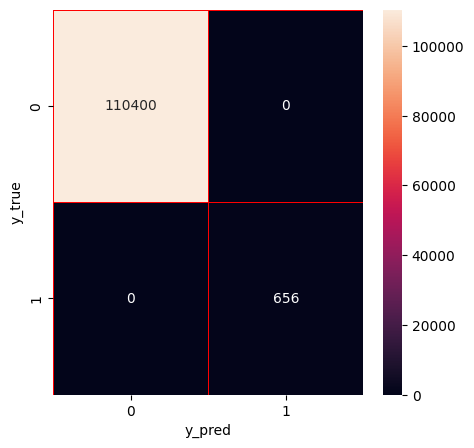

In [38]:
# Decision tree training and prediction
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train,y_train) 
dt_score=dt.score(X_test,y_test)
y_predict=dt.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [39]:
dt_train=dt.predict(X_train)
dt_test=dt.predict(X_test)

Accuracy of RF: 1.0
Precision of RF: 1.0
Recall of RF: 1.0
F1-score of RF: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110400
           1       1.00      1.00      1.00       656

    accuracy                           1.00    111056
   macro avg       1.00      1.00      1.00    111056
weighted avg       1.00      1.00      1.00    111056



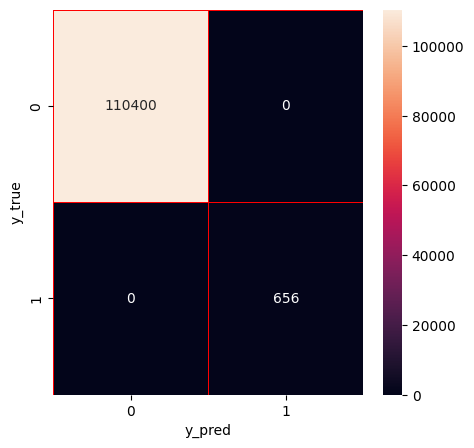

In [40]:
# Random Forest training and prediction
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train,y_train) 
rf_score=rf.score(X_test,y_test)
y_predict=rf.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [41]:
rf_train=rf.predict(X_train)
rf_test=rf.predict(X_test)

Accuracy of ET: 1.0
Precision of ET: 1.0
Recall of ET: 1.0
F1-score of ET: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110400
           1       1.00      1.00      1.00       656

    accuracy                           1.00    111056
   macro avg       1.00      1.00      1.00    111056
weighted avg       1.00      1.00      1.00    111056



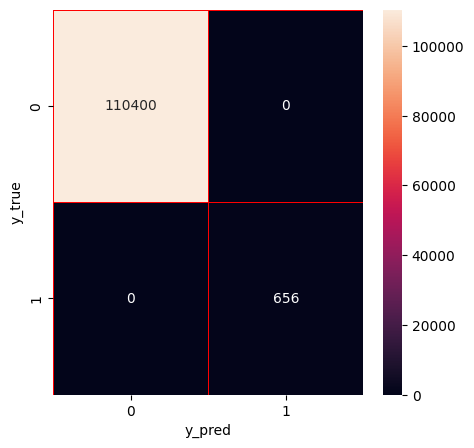

In [42]:
# Extra trees training and prediction
et = ExtraTreesClassifier(random_state = 0)
et.fit(X_train,y_train) 
et_score=et.score(X_test,y_test)
y_predict=et.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [43]:
et_train=et.predict(X_train)
et_test=et.predict(X_test)

Accuracy of XGBoost: 1.0
Precision of XGBoost: 1.0
Recall of XGBoost: 1.0
F1-score of XGBoost: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110400
           1       1.00      1.00      1.00       656

    accuracy                           1.00    111056
   macro avg       1.00      1.00      1.00    111056
weighted avg       1.00      1.00      1.00    111056



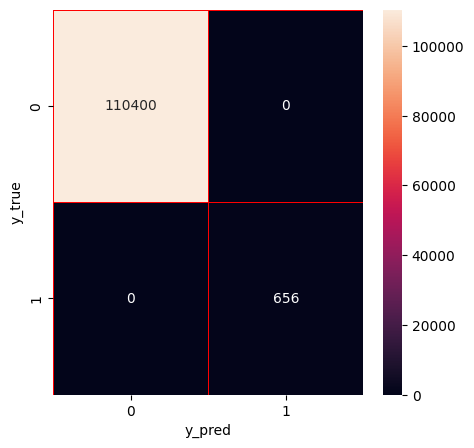

In [44]:
# XGboost training and prediction
xg = xgb.XGBClassifier(n_estimators = 10)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [45]:
xg_train=xg.predict(X_train)
xg_test=xg.predict(X_test)

In [46]:
# Use the outputs of 4 base models to construct a new ensemble model
base_predictions_train = pd.DataFrame( {
    'DecisionTree': dt_train.ravel(),
        'RandomForest': rf_train.ravel(),
     'ExtraTrees': et_train.ravel(),
     'XgBoost': xg_train.ravel(),
    })
base_predictions_train

,DecisionTree,RandomForest,ExtraTrees,XgBoost
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
883193,1,1,1,1
883194,1,1,1,1
883195,1,1,1,1
883196,1,1,1,1


In [47]:
dt_train=dt_train.reshape(-1, 1)
et_train=et_train.reshape(-1, 1)
rf_train=rf_train.reshape(-1, 1)
xg_train=xg_train.reshape(-1, 1)
dt_test=dt_test.reshape(-1, 1)
et_test=et_test.reshape(-1, 1)
rf_test=rf_test.reshape(-1, 1)
xg_test=xg_test.reshape(-1, 1)

In [48]:
x_train = np.concatenate(( dt_train, et_train, rf_train, xg_train), axis=1)
x_test = np.concatenate(( dt_test, et_test, rf_test, xg_test), axis=1)

In [49]:
stk = xgb.XGBClassifier().fit(x_train, y_train)

Accuracy of Stacking: 1.0
Precision of Stacking: 1.0
Recall of Stacking: 1.0
F1-score of Stacking: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110400
           1       1.00      1.00      1.00       656

    accuracy                           1.00    111056
   macro avg       1.00      1.00      1.00    111056
weighted avg       1.00      1.00      1.00    111056



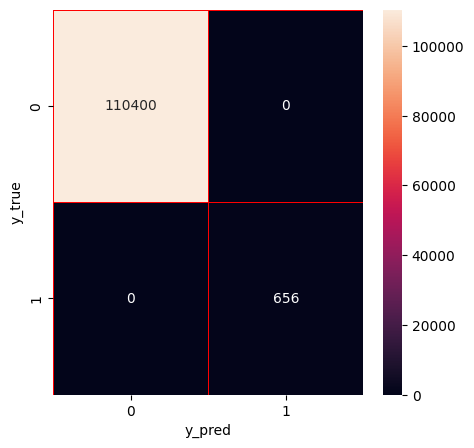

In [50]:
y_predict=stk.predict(x_test)
y_true=y_test
stk_score=accuracy_score(y_true,y_predict)
print('Accuracy of Stacking: '+ str(stk_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

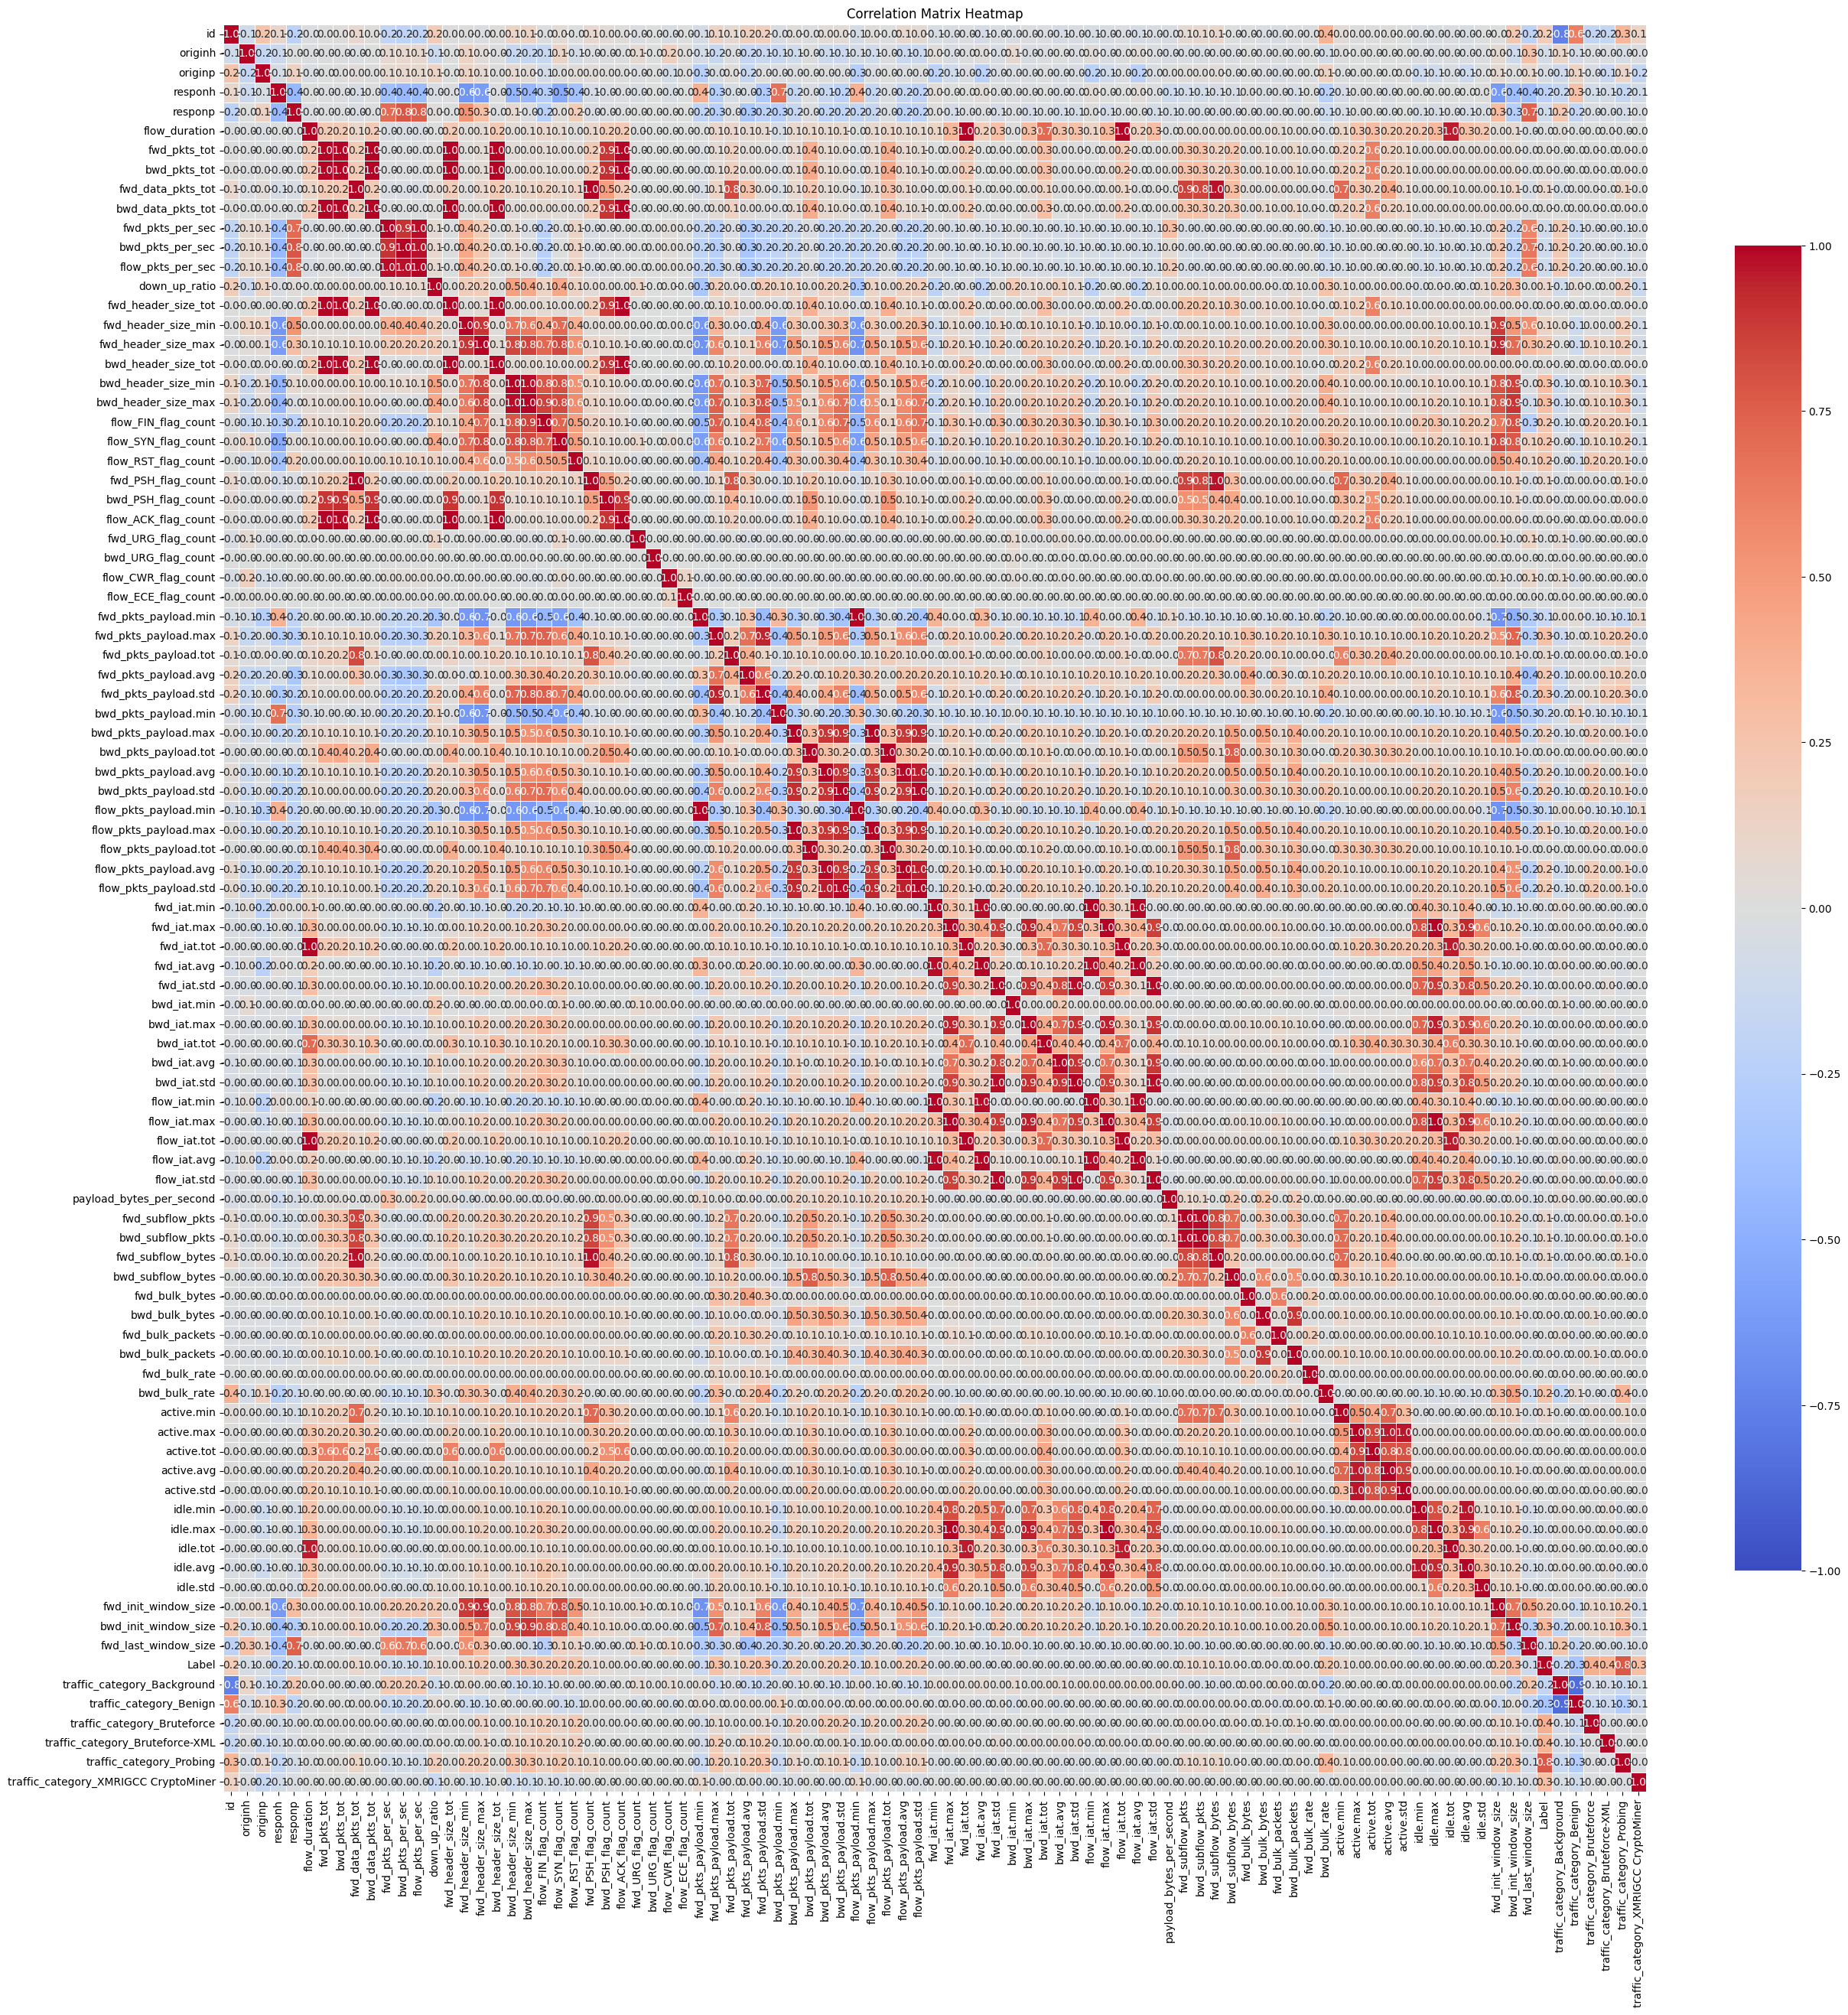

In [52]:
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(30, 30))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, 
            annot=True,           # Annotate cells with the correlation values
            fmt=".1f",            # Format the annotations to two decimal places
            cmap='coolwarm',      # Color map
            vmin=-1, vmax=1,      # Value range for the colormap
            linewidths=.5,        # Line width between cells
            cbar_kws={"shrink": .75})  # Color bar size

plt.title('Correlation Matrix Heatmap')
plt.show()